# Predicting if the voice is used by a male or female based on various variables
In this Jupyter notebook I'm going to train a model that will be able to predict if a voice is used by a male or female based on various variables. The variables used are:
- mean frequency
- median frequency
- Q25
- Q75
- IQR
- mean fun
- label

I chose these variables because they all have connection to the label, which is either male or female, and because they give a good indication if the voice is either from a male or female.


In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

df1 = pd.read_csv('voice.csv')
df1.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [2]:
df_subset = df1[['meanfreq', 'median', 'meanfun', 'meandom', 'IQR', 'dfrange', 'label']]
df_subset

,meanfreq,median,meanfun,meandom,IQR,dfrange,label
0,0.059781,0.032027,0.084279,0.007812,0.075122,0.000000,male
1,0.066009,0.040229,0.107937,0.009014,0.073252,0.046875,male
2,0.077316,0.036718,0.098706,0.007990,0.123207,0.007812,male
3,0.151228,0.158011,0.088965,0.201497,0.111374,0.554688,male
4,0.135120,0.124656,0.106398,0.712812,0.127325,5.476562,male
...,...,...,...,...,...,...,...
3163,0.131884,0.153707,0.182790,0.832899,0.151859,4.203125,female
3164,0.116221,0.076758,0.188980,0.909856,0.162193,3.640625,female
3165,0.142056,0.183731,0.209918,0.494271,0.190936,2.929688,female
3166,0.143659,0.184976,0.172375,0.791360,0.176435,3.585938,female


In [3]:
df_subset= df_subset[df_subset['dfrange'] != 0]

df_subset

,meanfreq,median,meanfun,meandom,IQR,dfrange,label
1,0.066009,0.040229,0.107937,0.009014,0.073252,0.046875,male
2,0.077316,0.036718,0.098706,0.007990,0.123207,0.007812,male
3,0.151228,0.158011,0.088965,0.201497,0.111374,0.554688,male
4,0.135120,0.124656,0.106398,0.712812,0.127325,5.476562,male
5,0.132786,0.119090,0.110132,0.298222,0.141634,2.718750,male
...,...,...,...,...,...,...,...
3163,0.131884,0.153707,0.182790,0.832899,0.151859,4.203125,female
3164,0.116221,0.076758,0.188980,0.909856,0.162193,3.640625,female
3165,0.142056,0.183731,0.209918,0.494271,0.190936,2.929688,female
3166,0.143659,0.184976,0.172375,0.791360,0.176435,3.585938,female


In [4]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 1 to 3167
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3103 non-null   float64
 1   median    3103 non-null   float64
 2   meanfun   3103 non-null   float64
 3   meandom   3103 non-null   float64
 4   IQR       3103 non-null   float64
 5   dfrange   3103 non-null   float64
 6   label     3103 non-null   object 
dtypes: float64(6), object(1)
memory usage: 193.9+ KB


# Exploratory data analysis

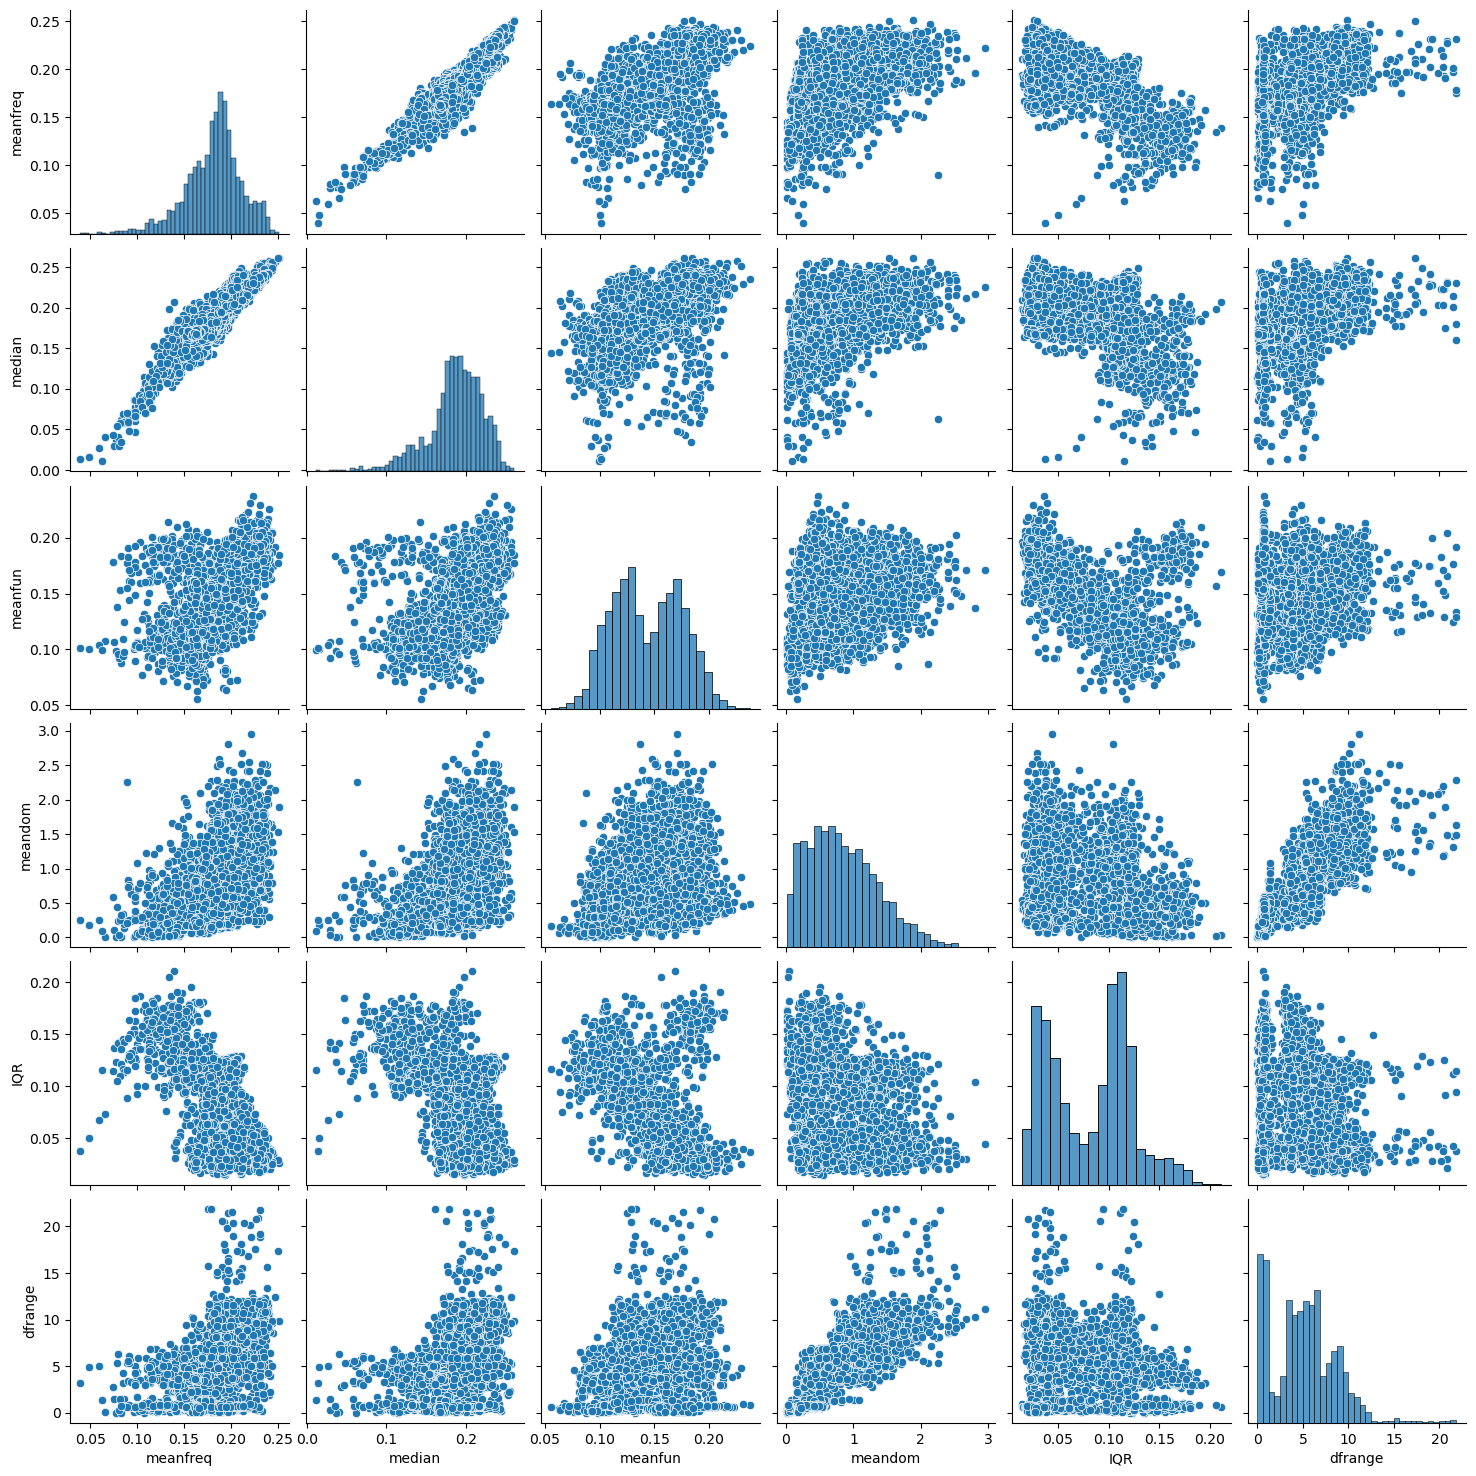

In [5]:
#df_plots = df1[['meanfreq', 'median', 'Q25', 'Q75', 'IQR', 'meanfun','label']] #making a new dataframe with a subset
sns.pairplot(df_subset)
plt.show()

One of the most noticable things in this pairplot are the 2 peaks within the 'IQR' distplot. This has something to do with a higher IQR for either the male of female group. This graph will be shown below in more detail to interpret the results better.

/Users/pepijnvanvugt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


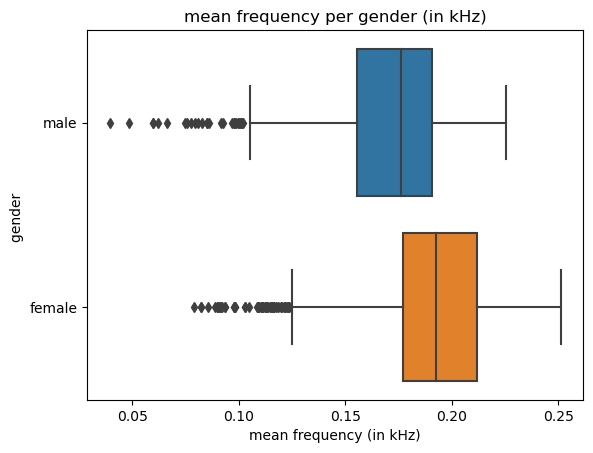

In [6]:
sns.boxplot(df1['meanfreq'],df1['label'])
plt.xlabel('mean frequency (in kHz)')
plt.ylabel("gender ")
plt.title('mean frequency per gender (in kHz)')
plt.show()

Normality: What stands out is that the male group has a lower mean frequency than the female group. This makes sense, because men have a lower frequency in khZ than woman. 

Variation: There is quite a  variation between the two genders, with the mean frequency of the female group starting at around 0.07 with a even distribution.

Modality: Difficult to see.

Skewness: the male group has a big left skewed distribution. The female group also has a left distribution, but it's less compared to the male group.

Outliers: Within the men there are a few outliers below the 0.05 mean frequency. The female group has outliers, but these are more compact.

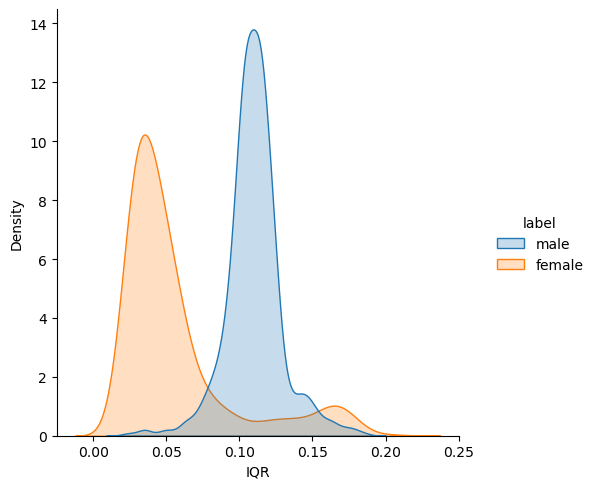

In [7]:
sns.displot(df_subset, x="IQR", hue="label", kind="kde", fill=True)
plt.show()

Normality: What stands out is that within male group the interquantile range is higher than within the female group. This has to do with the frequency of both groups.

Variation: There is quite a variation between the two genders. The IQR for the famel group is lower, with the peak at around 0.04 and a lower density. For the male group the peak is at around 0.12 and with a higher density.

Modality: Both gender have a unimodel modality, which means they have one big peak.

Skewness: The male group has an symmetrical skewness while the female group has a rightsided skewness.

Outliers: The female group has a small outlier at around the 0.16/0.17 IQR mark.

# Predictive model

In [8]:
df_subset['label'].value_counts()

female    1565
male      1538
Name: label, dtype: int64

In [10]:
X = df_subset.loc[:,'meanfreq':'dfrange'] 
y = df_subset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

# Evaluating the model


In [12]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['male (actual)', 'female (actual)'], columns = ['not male (pred)', 'not female (pred)']) #label and make df
cm

,not male (pred),not female (pred)
male (actual),436,6
female (actual),19,470


As is seen from the confusion matrix, the model is able to predict the label 'male' quite well in comparison to female. 

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.96      0.99      0.97       442
        male       0.99      0.96      0.97       489

    accuracy                           0.97       931
   macro avg       0.97      0.97      0.97       931
weighted avg       0.97      0.97      0.97       931



#### Accuracy

In [14]:
(436+470)/(436+6+19+470)

0.9731471535982814

This means that the accuracy of this model on this dataset is 97.3%

#### Precision (predicted) not female

In [17]:
470/(6+470)

0.9873949579831933

The precision is 98.7%, this means that it's 1.4% better than the overall accuracy

#### Recall

In [18]:
470/(19+470)

0.9611451942740287

The recall is 96.1%. This is 1.2% worse than the accuracy, but still very good.

# Conclusion